In [109]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

load_city_data = "/Users/anish/Desktop/city_data.csv"
load_ride_data = "/Users/anish/Desktop/ride_data.csv"

In [110]:
city_data = pd.read_csv(load_city_data)
ride_data = pd.read_csv(load_ride_data)

In [111]:
combined_data = pd.merge(city_data, ride_data, how = "outer", on = "city")
combined_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [112]:
avg_fare = combined_data.groupby("city").fare.mean()

In [113]:
avg_fare_df = pd.DataFrame(avg_fare)

In [114]:
avg_fare_df.head()

,fare
city,
Amandaburgh,24.641667
Barajasview,25.332273
Barronchester,36.422500
Bethanyland,32.956111
Bradshawfurt,40.064000


In [115]:
total_rides = combined_data.groupby("city").ride_id.count()

In [116]:
total_rides_df = pd.DataFrame(total_rides)

In [117]:
total_rides_df.head()

,ride_id
city,
Amandaburgh,18
Barajasview,22
Barronchester,16
Bethanyland,18
Bradshawfurt,10


In [118]:
total_drivers = combined_data.groupby("city").driver_count.value_counts()

In [119]:
total_drivers_df = pd.DataFrame(total_drivers)

In [120]:
total_drivers_df.head()

,,driver_count
city,driver_count,
Amandaburgh,12,18
Barajasview,26,22
Barronchester,11,16
Bethanyland,22,18
Bradshawfurt,7,10


In [121]:
city_type = combined_data.type.unique()

In [122]:
city_type_df = pd.DataFrame(city_type)

In [123]:
city_type_df.head()

,0
0,Urban
1,Suburban
2,Rural


In [124]:
type(city_type_df)

pandas.core.frame.DataFrame

In [125]:
#defining the city type (Urban, Suburban, Rural)
urban = combined_data.loc[(combined_data["type"] == "Urban")]
suburban = combined_data.loc[(combined_data["type"] == "Suburban")]
rural = combined_data.loc[(combined_data["type"] == "Rural")]

In [127]:
#following directions for each city type in lines 127, 128, 129
# 1. Average fare per city
# 2. Total number of rides per city
# 3. Total number of drivers per city
avg_urban_city_fare = urban.groupby(["city"])["fare"].mean()
total_urban_city_rides = urban.groupby(["city"]).count()["ride_id"]
total_urban_city_drivers = urban.groupby(["city"])["driver_count"].value_counts()

In [128]:
avg_suburban_city_fare = suburban.groupby(["city"])["fare"].mean()
total_suburban_city_rides = suburban.groupby(["city"]).count()["ride_id"]
total_suburban_city_drivers = suburban.groupby(["city"])["driver_count"].value_counts()

In [129]:
avg_rural_city_fare = rural.groupby(["city"])["fare"].mean()
total_rural_city_rides = rural.groupby(["city"]).count()["ride_id"]
total_rural_city_drivers = rural.groupby(["city"])["driver_count"].value_counts()

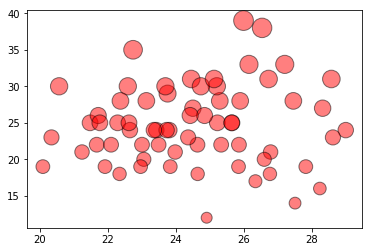

In [262]:
plt.scatter(avg_urban_city_fare, total_urban_city_rides, s = total_urban_city_drivers * 10,
           marker = "o", facecolors = "red", edgecolors = "black", alpha = 0.5, label = "Urban")

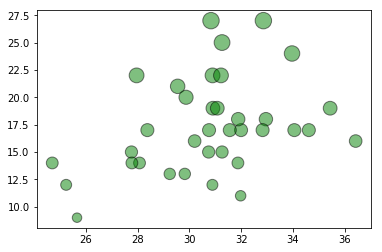

In [136]:
plt.scatter(avg_suburban_city_fare, total_suburban_city_rides, s = total_suburban_city_drivers * 10,
           marker = "o", facecolors = "green", edgecolors = "black", alpha = 0.5, label = "Suburban")

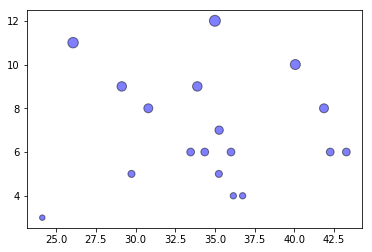

In [137]:
plt.scatter(avg_rural_city_fare, total_rural_city_rides, s = total_rural_city_drivers * 10,
           marker = "o", facecolors = "blue", edgecolors = "black", alpha = 0.5, label = "Rural")

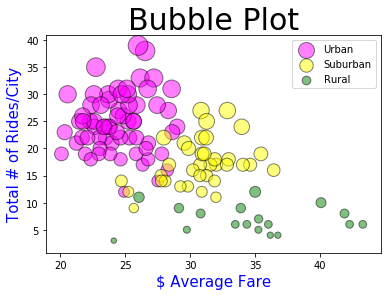

In [260]:
#magenta color represents the average city fares in urban areas
plt.scatter(avg_urban_city_fare, total_urban_city_rides, s = total_urban_city_drivers * 10,
           marker = "o", facecolors = "magenta", edgecolors = "black", alpha = 0.5, label = "Urban")
#yellow color represents the average city fares in suburban areas
plt.scatter(avg_suburban_city_fare, total_suburban_city_rides, s = total_suburban_city_drivers * 10,
           marker = "o", facecolors = "yellow", edgecolors = "black", alpha = 0.5, label = "Suburban")
#green color represents the average city fares in rural areas
plt.scatter(avg_rural_city_fare, total_rural_city_rides, s = total_rural_city_drivers * 10,
           marker = "o", facecolors = "green", edgecolors = "black", alpha = 0.5, label = "Rural")
plt.title("Bubble Plot", fontsize = 30)
plt.xlabel("$ Average Fare", fontsize = 15, color = "blue")
plt.ylabel("Total # of Rides/City", fontsize = 15, color = "blue")
#reference box to intrepret bubble plot
plt.legend(loc = "upper right")

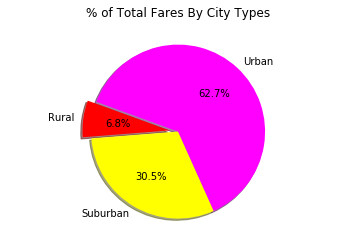

In [242]:
total_citytype_fares = combined_data.groupby(['type'])['fare'].sum()
labels = ["Rural","Suburban","Urban"]
colors = ["red","yellow","magenta"]
explode = (0.1, 0, 0)
plt.axis("equal")
plt.title("% of Total Fares By City Types")
plt.pie(total_citytype_fares, labels = labels, explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 160)
plt.show()

In [239]:
total_citytype_fares.head()
# Rural = 4327.93/63538.64 * 100 = 6.81%
# Suburban = 19356.33/63538.64 * 100 = 30.46%
# Urban = 39854.38/63538.64 * 100 = 62.72%

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

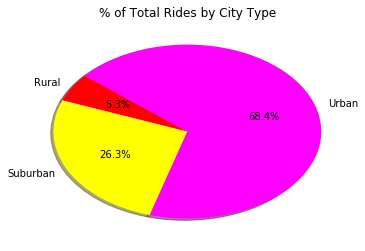

In [236]:
total_citytype_rides = combined_data.groupby(["type"])["ride_id"].count()
labels = ["Rural", "Suburban", "Urban"]
colors = ["red", "yellow", "magenta"]
explode = (0, 0, 0)
plt.title("% of Total Rides by City Type")
plt.pie(total_citytype_rides, labels = labels, explode = explode, colors = colors, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.show()

In [237]:
total_citytype_rides.head()
# Rural = 125/2375 * 100 = 5.26%
# Suburban = 625/2375 * 100 = 26.31%
# Urban = 1625/2375 * 100 = 68.4%

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

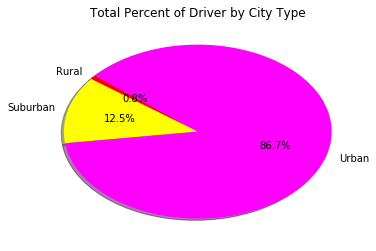

In [238]:
total_citytype_drivers = combined_data.groupby(["type"])["driver_count"].sum()
labels = ["Rural", "Suburban", "Urban"]
colors = ["red", "yellow", "magenta"]
explode = (0, 0, 0)
plt.title("Total Percent of Driver by City Type")
plt.pie(total_citytype_drivers, labels = labels, colors = colors, explode = explode, autopct = "%1.1f%%", shadow = True, startangle = 140)
plt.show()

In [229]:
total_citytype_drivers.head()
# Rural = 573/68709 * 100 = 0.78%
# Suburban = 8570/68709 * 100 = 12.47%
# Urban = 59602/68709 * 100 = 86.7%

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64